In [72]:
import base_defs as base
import base_defs_2 as b2

from importlib import reload; reload(base); reload(b2)
import zipfile
import time
import MDAnalysis as mda
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import shutup
from io import BytesIO
from io import StringIO
import gzip as gz
import warnings
import os
import re
import random
import pickle
import copy

zip_path_virus = "/media/andrej/KEYCHAIN II/bsr_data/ProBiS_Dock_DB_bs_id1division_id9.zip"
#zip_path_virus = "E:/bsr_data/ProBiS_Dock_DB_bs_id1division_id9.zip"


In [197]:
def get_sum_from_tsv(path):
    files = os.listdir(path)
    #all_AAs=["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
    per_pdb_df = pd.concat([pd.read_csv(path+file, sep="\t", usecols=range(1,104)) for file in files])

    return per_pdb_df
    #return pd.DataFrame([pd.Series(per_pdb_df.filter(regex=cat+".*").sum().rename(index=lambda x: x[-3:])) for cat in categories]).transpose().set_axis(categories, axis=1)
all_bsites = get_sum_from_tsv("./data/virus_out_2/")

In [236]:
files = os.listdir("./data/old/validation_virus_out/")
#all_AAs=["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
all_bsites_old = pd.concat([pd.read_csv("./data/old/validation_virus_out/"+file, sep="\t", usecols=range(0,103)) for file in files])
new_counts = all_bsites[all_bsites["bsite_id"]=="ALL"].groupby("pdb_id", as_index=True).sum().drop(["chain_id","bsite_id"], axis=1)

old_counts = all_bsites_old.drop(["num_chains","num_bsites"], axis=1).sort_values("pdb_id").set_index("pdb_id")

In [270]:
new_counts.filter(regex="total").sum().sum()

2939254

In [267]:
(new_counts-old_counts).filter(regex="total").sum().sum()

124

In [262]:
new_counts.loc['2hpe'].filter(regex="total").sum()

198

In [261]:
old_counts.loc['2hpe'].filter(regex="total").sum()

189

In [242]:
df = new_counts-old_counts
print(df[(df.T != 0).any()].to_string())

        bsite_surf_ALA  bsite_surf_ARG  bsite_surf_ASN  bsite_surf_ASP  bsite_surf_CYS  bsite_surf_GLN  bsite_surf_GLU  bsite_surf_GLY  bsite_surf_HIS  bsite_surf_ILE  bsite_surf_LEU  bsite_surf_LYS  bsite_surf_MET  bsite_surf_PHE  bsite_surf_PRO  bsite_surf_SER  bsite_surf_THR  bsite_surf_TRP  bsite_surf_TYR  bsite_surf_VAL  bsite_core_ALA  bsite_core_ARG  bsite_core_ASN  bsite_core_ASP  bsite_core_CYS  bsite_core_GLN  bsite_core_GLU  bsite_core_GLY  bsite_core_HIS  bsite_core_ILE  bsite_core_LEU  bsite_core_LYS  bsite_core_MET  bsite_core_PHE  bsite_core_PRO  bsite_core_SER  bsite_core_THR  bsite_core_TRP  bsite_core_TYR  bsite_core_VAL  other_surf_ALA  other_surf_ARG  other_surf_ASN  other_surf_ASP  other_surf_CYS  other_surf_GLN  other_surf_GLU  other_surf_GLY  other_surf_HIS  other_surf_ILE  other_surf_LEU  other_surf_LYS  other_surf_MET  other_surf_PHE  other_surf_PRO  other_surf_SER  other_surf_THR  other_surf_TRP  other_surf_TYR  other_surf_VAL  other_core_ALA  other_core_ARG  

In [247]:
all_bsites[all_bsites["pdb_id"]=="2hpe"]

pdb_id chain_id    bsite_id  bsite_surf_ALA  bsite_surf_ARG  \
442   2hpe        A  compound_2               0               0   
443   2hpe        A  compound_3               0               1   
444   2hpe        A  compound_4               0               0   
445   2hpe        A         ALL               0               1   
446   2hpe        B  compound_2               0               0   
447   2hpe        B  compound_3               0               1   
448   2hpe        B  compound_4               0               0   
449   2hpe        B         ALL               0               1   

     bsite_surf_ASN  bsite_surf_ASP  bsite_surf_CYS  bsite_surf_GLN  \
442               1               1               0               0   
443               0               0               0               0   
444               0               0               0               0   
445               1               1               0               0   
446               1               1               0               0   
447               0               0               0               0   
448               1               0               0               0   
449               1               1               0               0   

     bsite_surf_GLU  ...  total_LEU  total_LYS  total_MET  total_PHE  \
442               0  ...         10          5          2          3   
443               1  ...         10          5          2          3   
444               0  ...         10          5          2          3   
445               1  ...         10          5          2          3   
446               0  ...         10          5          2          3   
447               1  ...         10          5          2          3   
448               0  ...         10          5          2          3   
449               1  ...         10          5          2          3   

     total_PRO  total_SER  total_THR  total_TRP  total_TYR  total_VAL  
442          5          4          7          1          3          9  
443          5          4          7          1          3          9  
444          5          4          7          1          3          9  
445          5          4          7          1          3          9  
446          5          4          7          1          3          9  
447          5          4          7          1          3          9  
448          5          4          7          1          3          9  
449          5          4          7          1          3          9  

[8 rows x 103 columns]

In [76]:
all_bsites[(all_bsites["bsite_id"]=="ALL") & (all_bsites["pdb_id"]=="1a1r")]

pdb_id chain_id bsite_id  bsite_surf_ALA  bsite_surf_ARG  bsite_surf_ASN  \
15   1a1r        A      ALL               1               0               0   

    bsite_surf_ASP  bsite_surf_CYS  bsite_surf_GLN  bsite_surf_GLU  ...  \
15               1               0               1               0  ...   

    total_LEU  total_LYS  total_MET  total_PHE  total_PRO  total_SER  \
15         12          3          2          3         11         12   

    total_THR  total_TRP  total_TYR  total_VAL  
15         15          2          4         16  

[1 rows x 103 columns]

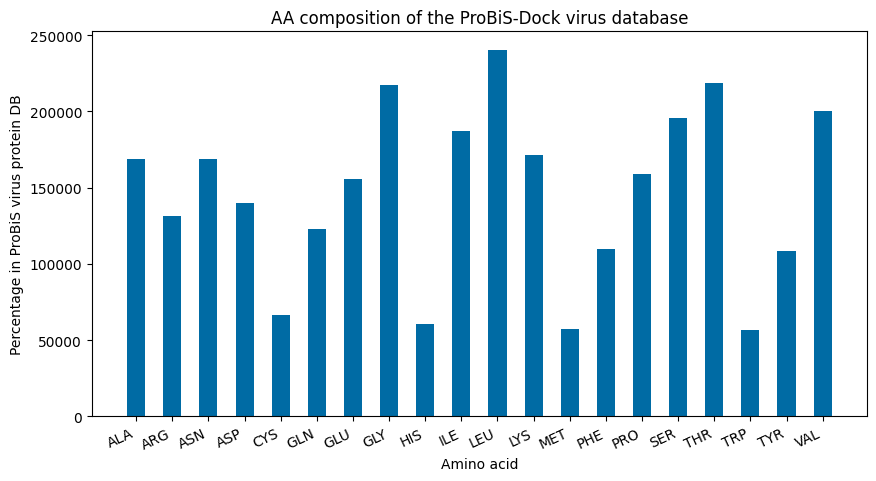

In [77]:
total_comp = all_bsites[all_bsites["bsite_id"]=="ALL"].iloc[:,83:103].sum()
all_aas=["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=all_aas, height=total_comp.values, width=0.5)
plt.xlabel("Amino acid")
plt.ylabel("Percentage in ProBiS virus protein DB")
plt.xticks(rotation=25, ha='right')
plt.title("AA composition of the ProBiS-Dock virus database")
plt.show()

In [121]:
old_counts.columns[0:]

Index(['num_bsites', 'num_chains', 'bsite_surf_ALA', 'bsite_surf_ARG',
       'bsite_surf_ASN', 'bsite_surf_ASP', 'bsite_surf_CYS', 'bsite_surf_GLN',
       'bsite_surf_GLU', 'bsite_surf_GLY',
       ...
       'total_LEU', 'total_LYS', 'total_MET', 'total_PHE', 'total_PRO',
       'total_SER', 'total_THR', 'total_TRP', 'total_TYR', 'total_VAL'],
      dtype='object', name='Unnamed: 0', length=102)

<Axes: >

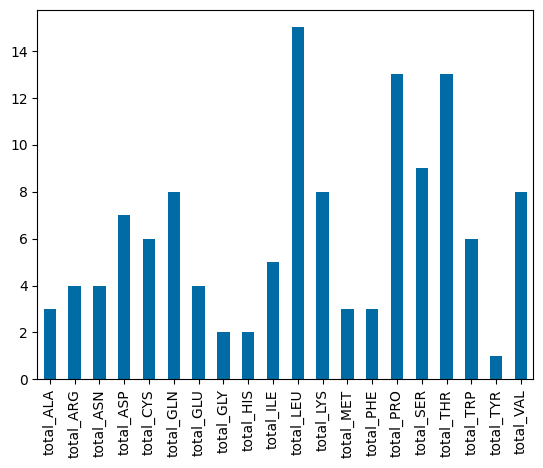

In [180]:

df = pd.read_csv("data/out/virus_probis_aa_composition_summed.tsv", sep="\t", index_col=False, header=0).transpose()
df.columns = df.iloc[0]
old_series = df.drop("Unnamed: 0").iloc[0,82:102]
new_series = all_bsites[all_bsites["bsite_id"]=="ALL"].filter(regex="total*").sum()

new_old_diff = new_series.sub(old_series)
new_old_diff.plot.bar()

In [188]:
new_series

total_ALA    169085
total_ARG    131440
total_ASN    168636
total_ASP    140108
total_CYS     66360
total_GLN    123209
total_GLU    155818
total_GLY    217625
total_HIS     60567
total_ILE    187426
total_LEU    240485
total_LYS    171755
total_MET     57452
total_PHE    109501
total_PRO    159075
total_SER    195968
total_THR    218873
total_TRP     56967
total_TYR    108598
total_VAL    200306
dtype: int64

In [181]:
new_old_diff

total_ALA     3
total_ARG     4
total_ASN     4
total_ASP     7
total_CYS     6
total_GLN     8
total_GLU     4
total_GLY     2
total_HIS     2
total_ILE     5
total_LEU    15
total_LYS     8
total_MET     3
total_PHE     3
total_PRO    13
total_SER     9
total_THR    13
total_TRP     6
total_TYR     1
total_VAL     8
dtype: object

In [94]:
all_bsites[(all_bsites['total_ALA']==3)&(all_bsites['total_ARG']==4)&(all_bsites['total_ASN']==4)&(all_bsites['total_ASP']==7)]

Empty DataFrame
Columns: [pdb_id, chain_id, bsite_id, bsite_surf_ALA, bsite_surf_ARG, bsite_surf_ASN, bsite_surf_ASP, bsite_surf_CYS, bsite_surf_GLN, bsite_surf_GLU, bsite_surf_GLY, bsite_surf_HIS, bsite_surf_ILE, bsite_surf_LEU, bsite_surf_LYS, bsite_surf_MET, bsite_surf_PHE, bsite_surf_PRO, bsite_surf_SER, bsite_surf_THR, bsite_surf_TRP, bsite_surf_TYR, bsite_surf_VAL, bsite_core_ALA, bsite_core_ARG, bsite_core_ASN, bsite_core_ASP, bsite_core_CYS, bsite_core_GLN, bsite_core_GLU, bsite_core_GLY, bsite_core_HIS, bsite_core_ILE, bsite_core_LEU, bsite_core_LYS, bsite_core_MET, bsite_core_PHE, bsite_core_PRO, bsite_core_SER, bsite_core_THR, bsite_core_TRP, bsite_core_TYR, bsite_core_VAL, other_surf_ALA, other_surf_ARG, other_surf_ASN, other_surf_ASP, other_surf_CYS, other_surf_GLN, other_surf_GLU, other_surf_GLY, other_surf_HIS, other_surf_ILE, other_surf_LEU, other_surf_LYS, other_surf_MET, other_surf_PHE, other_surf_PRO, other_surf_SER, other_surf_THR, other_surf_TRP, other_surf_TYR, other_surf_VAL, other_core_ALA, other_core_ARG, other_core_ASN, other_core_ASP, other_core_CYS, other_core_GLN, other_core_GLU, other_core_GLY, other_core_HIS, other_core_ILE, other_core_LEU, other_core_LYS, other_core_MET, other_core_PHE, other_core_PRO, other_core_SER, other_core_THR, other_core_TRP, other_core_TYR, other_core_VAL, total_ALA, total_ARG, total_ASN, total_ASP, total_CYS, total_GLN, total_GLU, total_GLY, total_HIS, total_ILE, total_LEU, total_LYS, total_MET, total_PHE, total_PRO, total_SER, total_THR, ...]
Index: []

[0 rows x 103 columns]

In [5]:
with zipfile.ZipFile(zip_path_virus, 'r') as probis_zip:
    pdb_dict = base.get_file_name_dict(probis_zip)
    chaingroup = base.get_chain_dict(pdb_dict['1a1r'])
    regions = base.get_regions_for_chain(chaingroup["A"], probis_zip)

/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1118
  warnings.warn(


In [ ]:
reload(b2)
with zipfile.ZipFile(zip_path_virus, 'r') as probis_zip:
    fdict = b2.get_file_name_dict(probis_zip)
    res = b2.probis_process(probis_zip, fdict, ["3pu0"])

In [165]:
reload(b2)
with zipfile.ZipFile(zip_path_virus, 'r') as probis_zip:
    pdb_dict = b2.get_file_name_dict(probis_zip)
    res_df = b2.probis_compute_final_counts(probis_zip, pdb_dict, ["1a1v"])

/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3221
  warnings.warn(
/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3221
  warnings.warn(
/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3221
  warnings.warn(
/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3221
  warnings.warn(
/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3221
  warnings.warn(
/home/andrej/miniconda3/envs/bsiteaa/lib/python3.12/site-packages/Bio/PDB/PDBParser.py:388: PDB

In [167]:
res_df.shape[0]

9

In [ ]:
res_df

In [ ]:
reload(b2)
with zipfile.ZipFile(zip_path_virus, 'r') as probis_zip:
    pdb_dict = b2.get_file_name_dict(probis_zip)
    res_df = b2.probis_compute_final_counts(probis_zip, pdb_dict, ["1a1r", "1a14"])

In [ ]:
reload(b2)
with zipfile.ZipFile(zip_path_virus, 'r') as probis_zip:
    pdb_dict = b2.get_file_name_dict(probis_zip)
    res_df = b2.probis_compute_final_counts(probis_zip, pdb_dict, ["4c0u"])
    

In [140]:
res_df

Empty DataFrame
Columns: [pdb_id, chain_id, bsite_id, bsite_surf_ALA, bsite_surf_ARG, bsite_surf_ASN, bsite_surf_ASP, bsite_surf_CYS, bsite_surf_GLN, bsite_surf_GLU, bsite_surf_GLY, bsite_surf_HIS, bsite_surf_ILE, bsite_surf_LEU, bsite_surf_LYS, bsite_surf_MET, bsite_surf_PHE, bsite_surf_PRO, bsite_surf_SER, bsite_surf_THR, bsite_surf_TRP, bsite_surf_TYR, bsite_surf_VAL, bsite_core_ALA, bsite_core_ARG, bsite_core_ASN, bsite_core_ASP, bsite_core_CYS, bsite_core_GLN, bsite_core_GLU, bsite_core_GLY, bsite_core_HIS, bsite_core_ILE, bsite_core_LEU, bsite_core_LYS, bsite_core_MET, bsite_core_PHE, bsite_core_PRO, bsite_core_SER, bsite_core_THR, bsite_core_TRP, bsite_core_TYR, bsite_core_VAL, other_surf_ALA, other_surf_ARG, other_surf_ASN, other_surf_ASP, other_surf_CYS, other_surf_GLN, other_surf_GLU, other_surf_GLY, other_surf_HIS, other_surf_ILE, other_surf_LEU, other_surf_LYS, other_surf_MET, other_surf_PHE, other_surf_PRO, other_surf_SER, other_surf_THR, other_surf_TRP, other_surf_TYR, other_surf_VAL, other_core_ALA, other_core_ARG, other_core_ASN, other_core_ASP, other_core_CYS, other_core_GLN, other_core_GLU, other_core_GLY, other_core_HIS, other_core_ILE, other_core_LEU, other_core_LYS, other_core_MET, other_core_PHE, other_core_PRO, other_core_SER, other_core_THR, other_core_TRP, other_core_TYR, other_core_VAL, total_ALA, total_ARG, total_ASN, total_ASP, total_CYS, total_GLN, total_GLU, total_GLY, total_HIS, total_ILE, total_LEU, total_LYS, total_MET, total_PHE, total_PRO, total_SER, total_THR, ...]
Index: []

[0 rows x 103 columns]

In [132]:
res_df[res_df["bsite_id"]=="ALL"].iloc[:,3:].sum()

bsite_surf_ALA      9
bsite_surf_ARG     11
bsite_surf_ASN     12
bsite_surf_ASP     16
bsite_surf_CYS      1
                 ... 
total_SER         164
total_THR         145
total_TRP          44
total_TYR         106
total_VAL         143
Length: 100, dtype: int64

In [11]:
new_df = pd.DataFrame(columns=["id"]+[cat+"_"+aa for aa in all_aas for cat in categories])
new_df

Empty DataFrame
Columns: [id, bsite_surf_ALA, bsite_core_ALA, other_surf_ALA, other_core_ALA, bsite_surf_ARG, bsite_core_ARG, other_surf_ARG, other_core_ARG, bsite_surf_ASN, bsite_core_ASN, other_surf_ASN, other_core_ASN, bsite_surf_ASP, bsite_core_ASP, other_surf_ASP, other_core_ASP, bsite_surf_CYS, bsite_core_CYS, other_surf_CYS, other_core_CYS, bsite_surf_GLN, bsite_core_GLN, other_surf_GLN, other_core_GLN, bsite_surf_GLU, bsite_core_GLU, other_surf_GLU, other_core_GLU, bsite_surf_GLY, bsite_core_GLY, other_surf_GLY, other_core_GLY, bsite_surf_HIS, bsite_core_HIS, other_surf_HIS, other_core_HIS, bsite_surf_ILE, bsite_core_ILE, other_surf_ILE, other_core_ILE, bsite_surf_LEU, bsite_core_LEU, other_surf_LEU, other_core_LEU, bsite_surf_LYS, bsite_core_LYS, other_surf_LYS, other_core_LYS, bsite_surf_MET, bsite_core_MET, other_surf_MET, other_core_MET, bsite_surf_PHE, bsite_core_PHE, other_surf_PHE, other_core_PHE, bsite_surf_PRO, bsite_core_PRO, other_surf_PRO, other_core_PRO, bsite_surf_SER, bsite_core_SER, other_surf_SER, other_core_SER, bsite_surf_THR, bsite_core_THR, other_surf_THR, other_core_THR, bsite_surf_TRP, bsite_core_TRP, other_surf_TRP, other_core_TRP, bsite_surf_TYR, bsite_core_TYR, other_surf_TYR, other_core_TYR, bsite_surf_VAL, bsite_core_VAL, other_surf_VAL, other_core_VAL]
Index: []

[0 rows x 81 columns]